In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme()
import plotly.io as pio
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel, RFECV
import json
import joblib
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay


In [66]:
data=pd.read_csv("Customer data.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [67]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


<Figure size 1000x800 with 0 Axes>

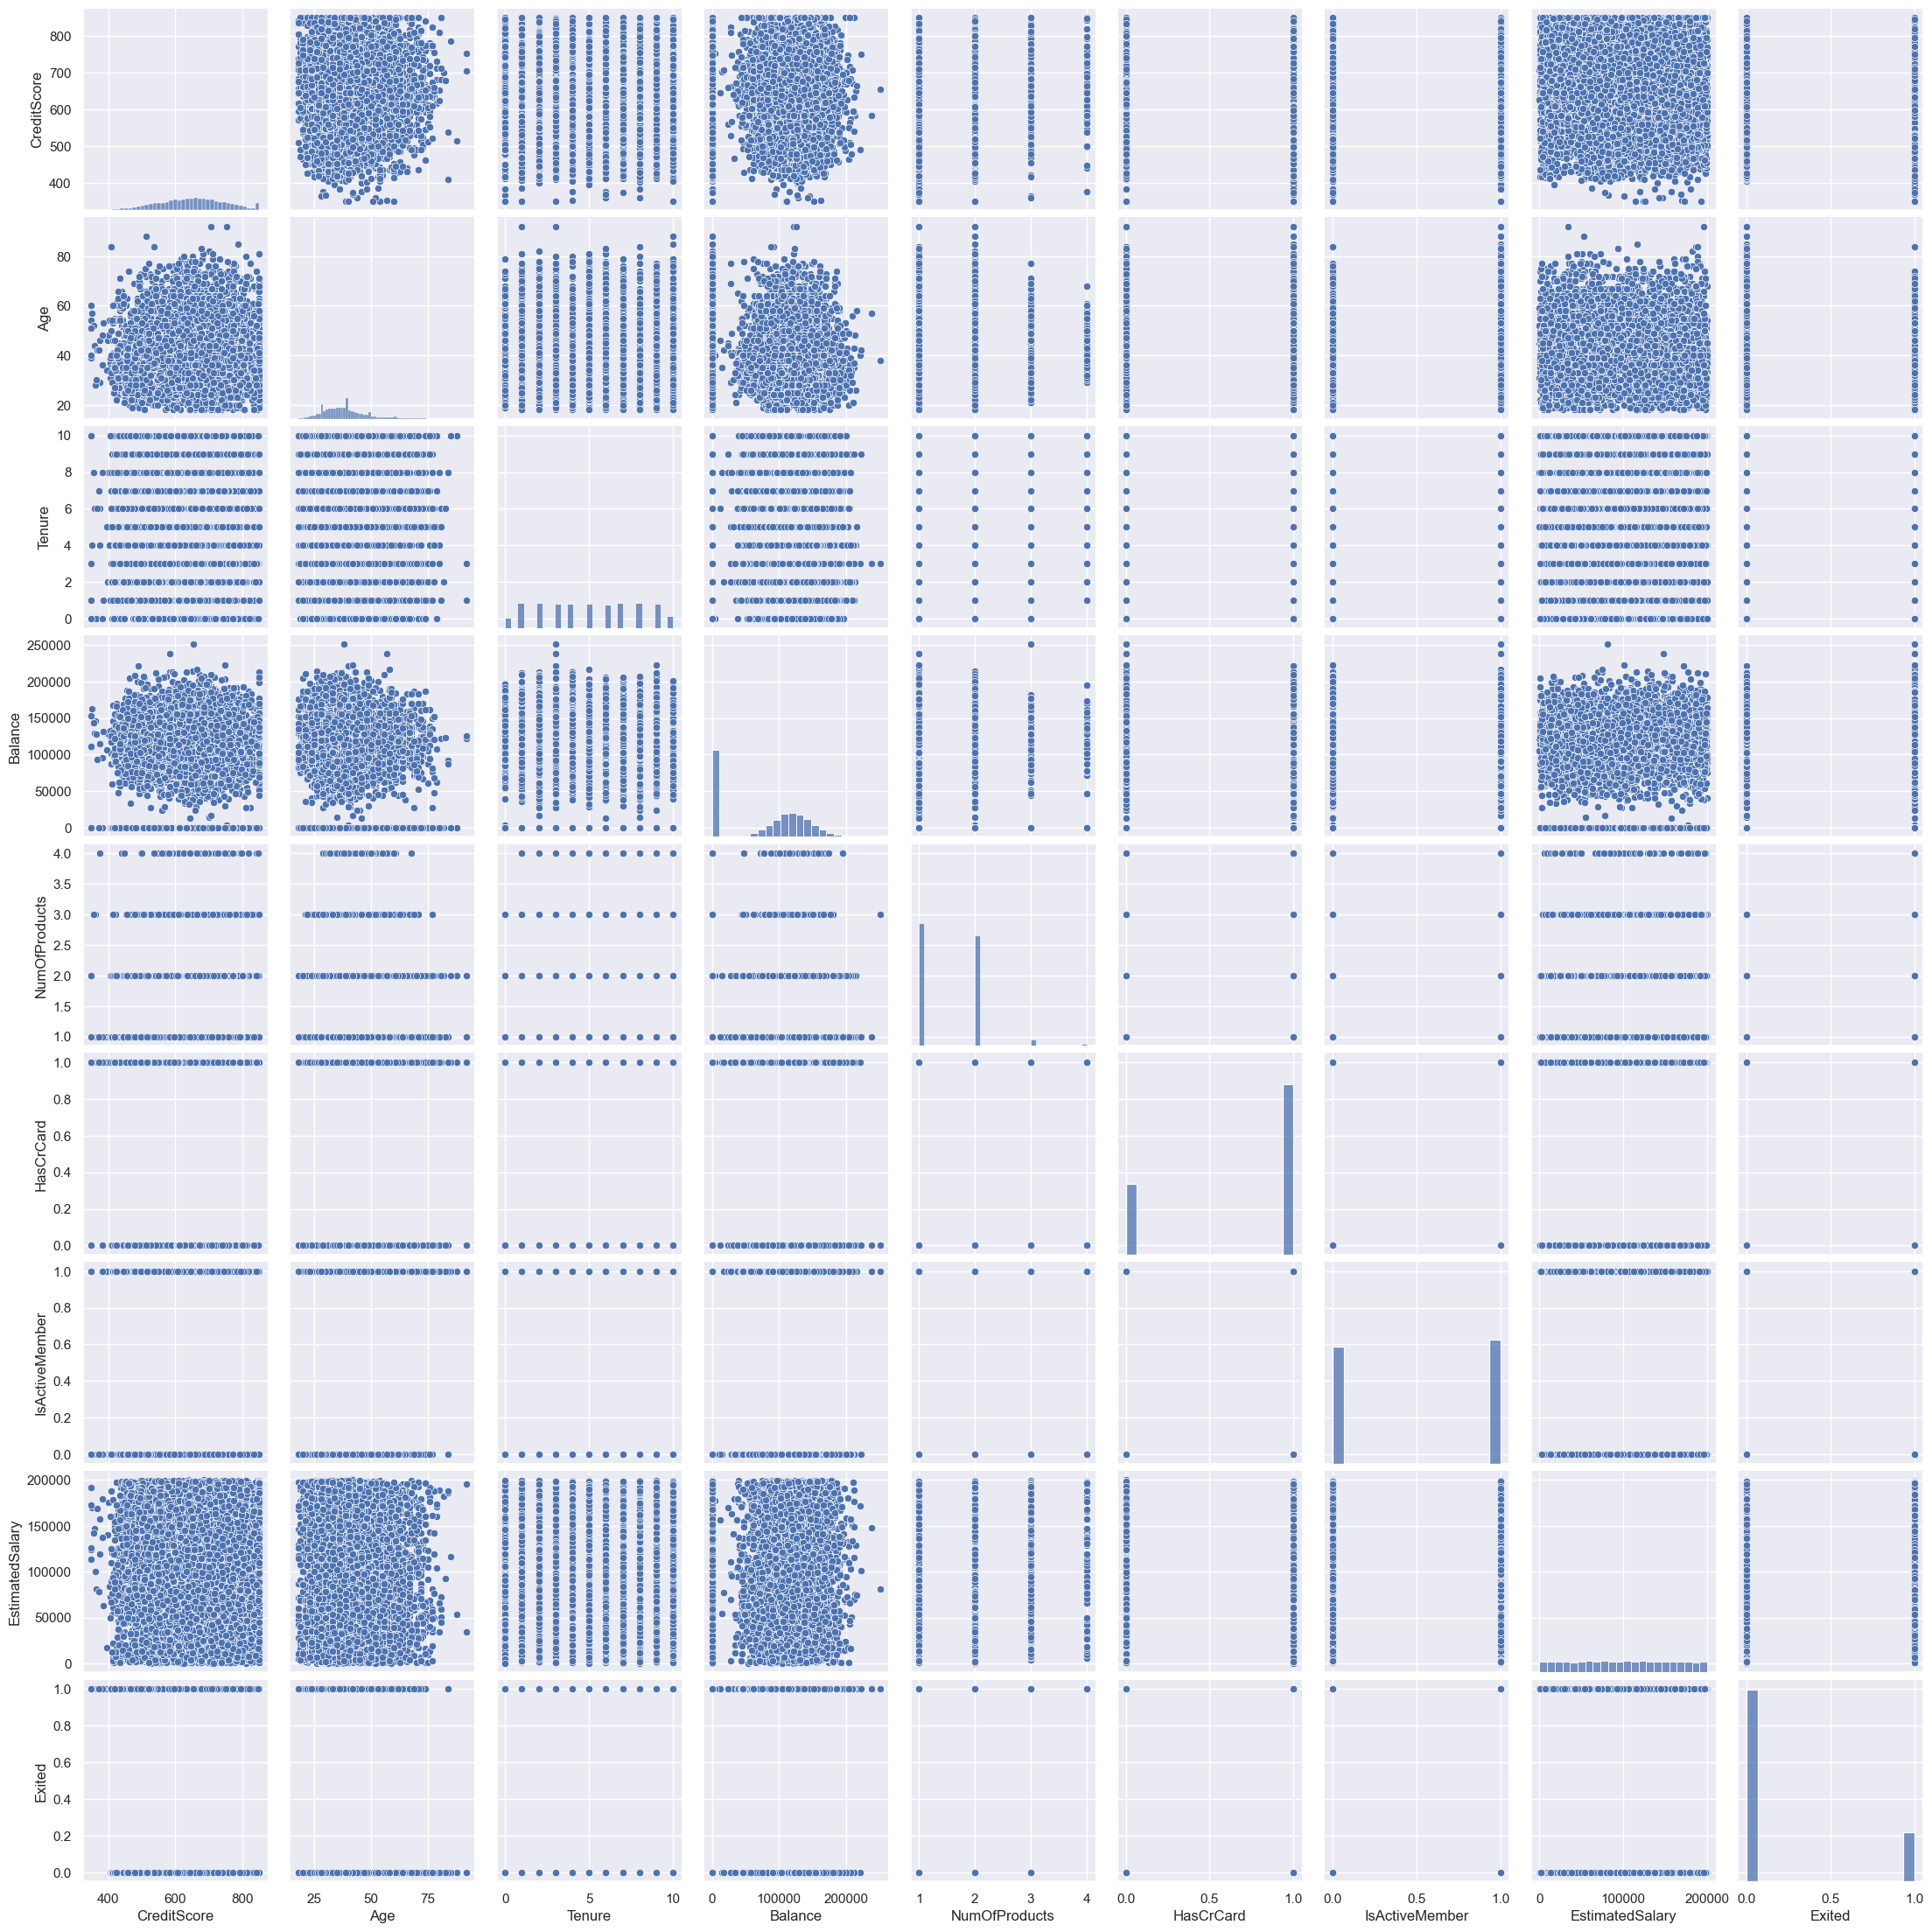

In [69]:
plt.figure(figsize=(10,8))
sns.pairplot(data)


In [70]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [71]:
gender_dist=data["Gender"].value_counts()
gender_dist

Male      5457
Female    4543
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Active members by gender.')

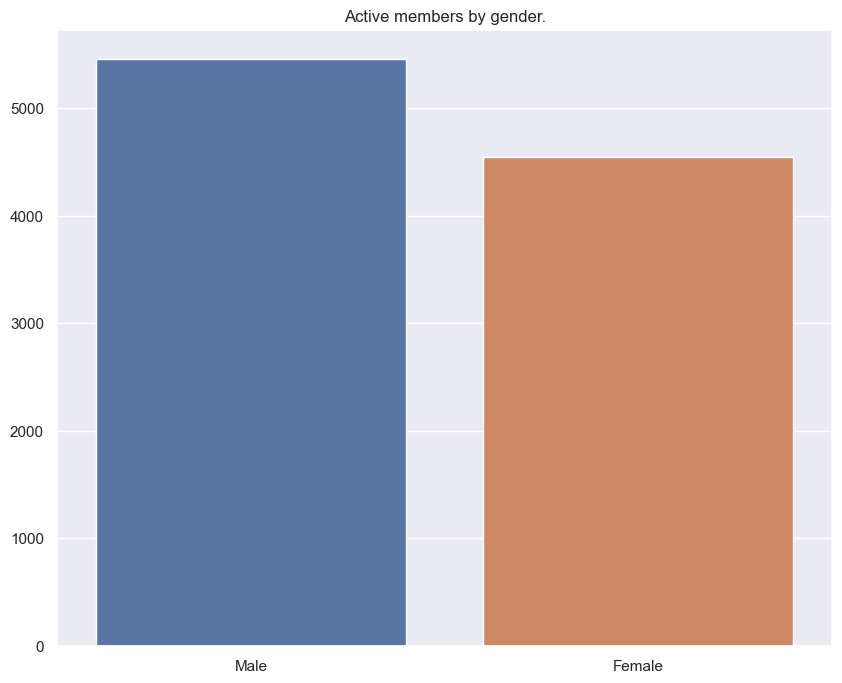

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=gender_dist.index, y=gender_dist.values, ax=ax)
ax.set_title("Active members by gender.")

In [73]:
geo_active=data["Geography"].value_counts()
geo_active

Kenya       5014
Tanzania    2509
Uganda      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Active members by Geography.')

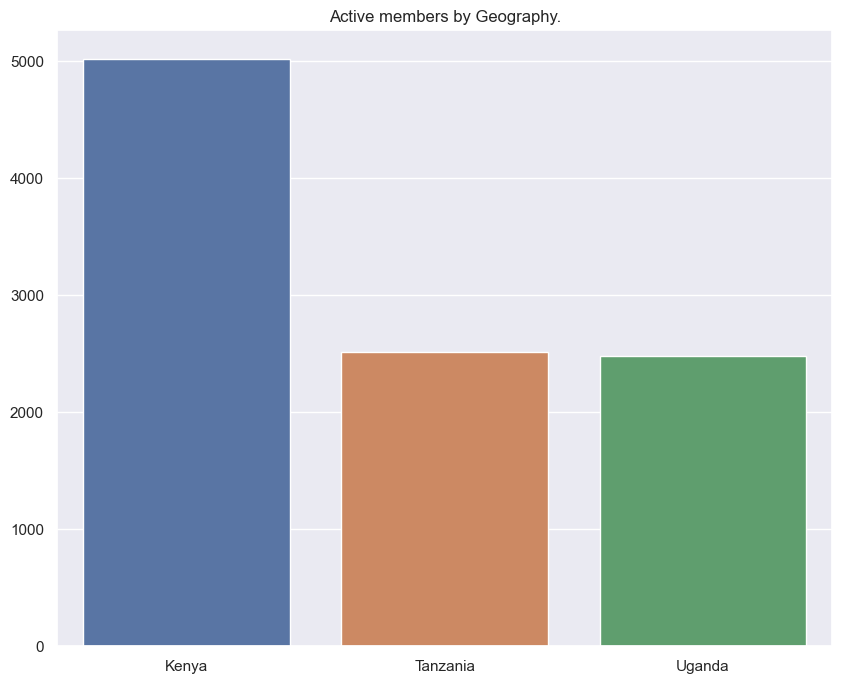

In [74]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=geo_active.index, y=geo_active.values, ax=ax)
ax.set_title("Active members by Geography.")

In [75]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [76]:
products=data["NumOfProducts"].value_counts()
products

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Text(0.5, 1.0, 'Product number by active customers')

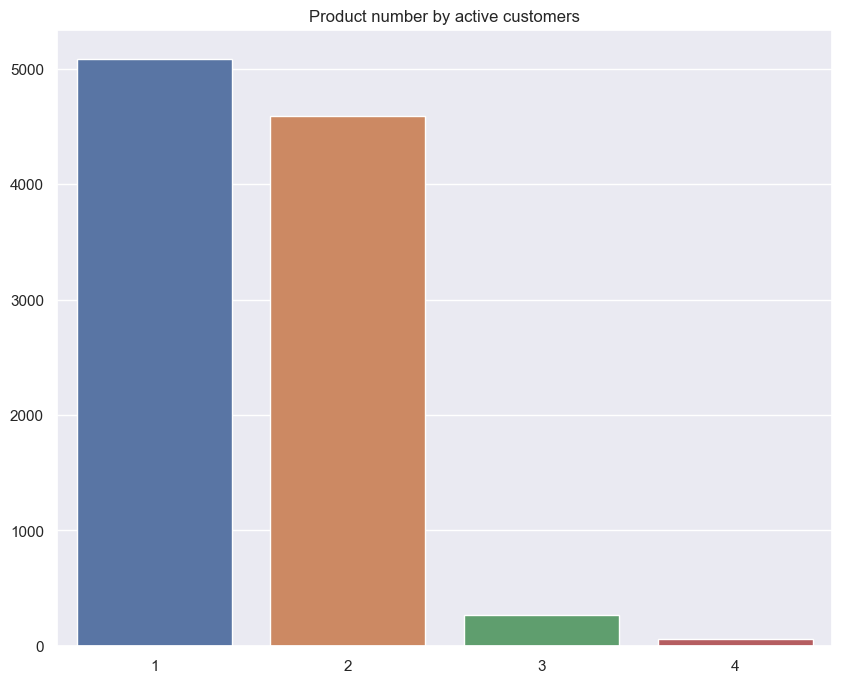

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=products.index, y=products.values, ax=ax)
ax.set_title("Product number by active customers")

In [78]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [79]:
has_card=data["HasCrCard"].value_counts()
has_card

1    7055
0    2945
Name: HasCrCard, dtype: int64

Text(0.5, 1.0, 'customers with credit cards vs no credit cards.')

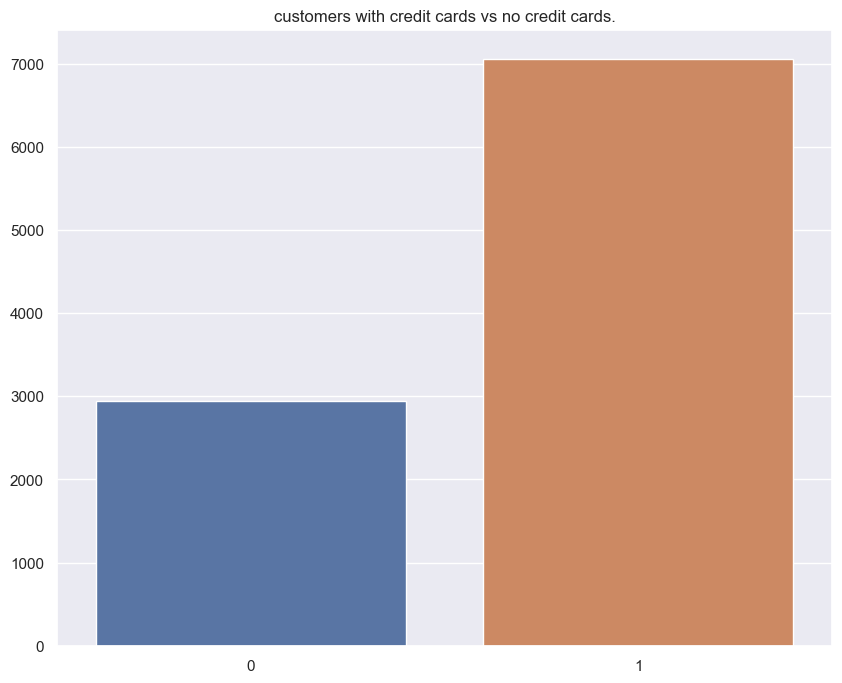

In [80]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=has_card.index, y=has_card.values, ax=ax)
ax.set_title("customers with credit cards vs no credit cards.")

In [81]:
active=data["IsActiveMember"].value_counts()

Text(0.5, 1.0, 'Active vs non active members.')

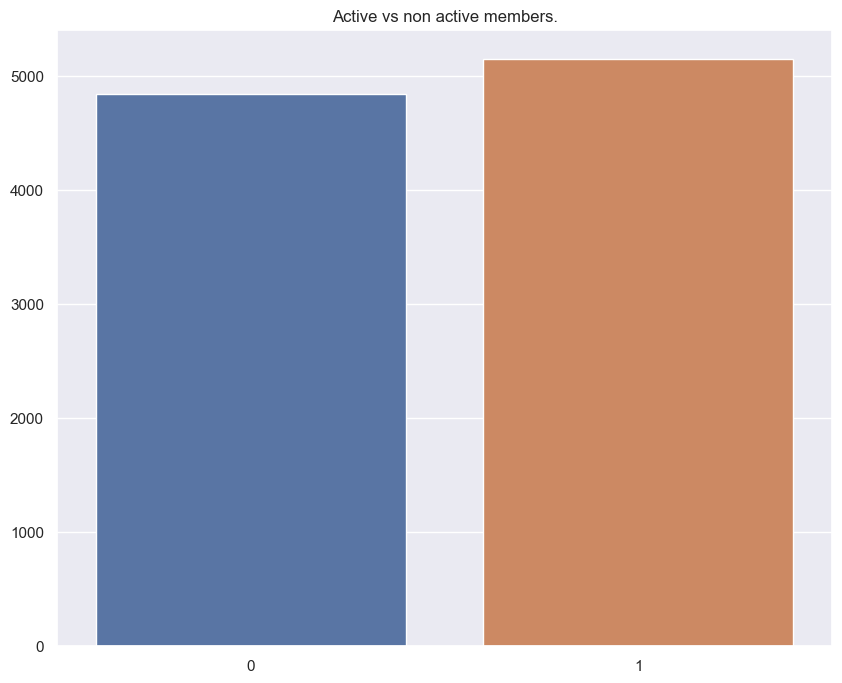

In [82]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=active.index, y=active.values, ax=ax)
ax.set_title("Active vs non active members.")

In [83]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [84]:
exit=data["Exited"].value_counts()
exit

0    7963
1    2037
Name: Exited, dtype: int64

Text(0.5, 1.0, 'Churn vs non-churn')

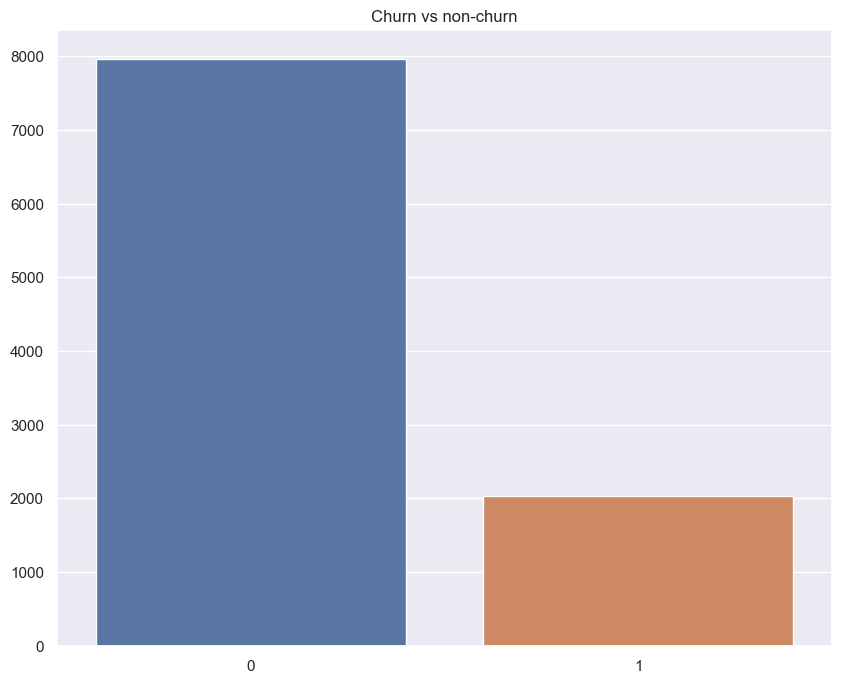

In [85]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=exit.index, y=exit.values, ax=ax)
ax.set_title("Churn vs non-churn")

In [86]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Exited', ylabel='Age'>

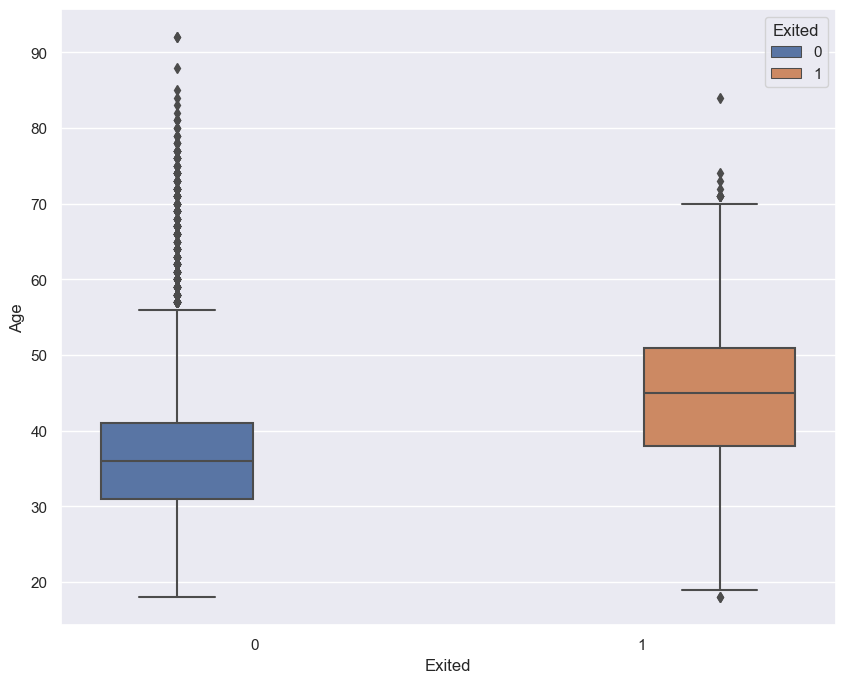

In [87]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x="Exited",y="Age",hue="Exited")


In [88]:
Q1=data["Age"].quantile(0.25)
Q3=data["Age"].quantile(0.75)

IQR=Q3-Q1

lower_bound= Q1-1.5 * IQR
upper_bound= Q3 + 1.5 *IQR


data=data[(data["Age"] >= lower_bound) & (data["Age"]<=upper_bound)]


<Axes: xlabel='Exited', ylabel='Age'>

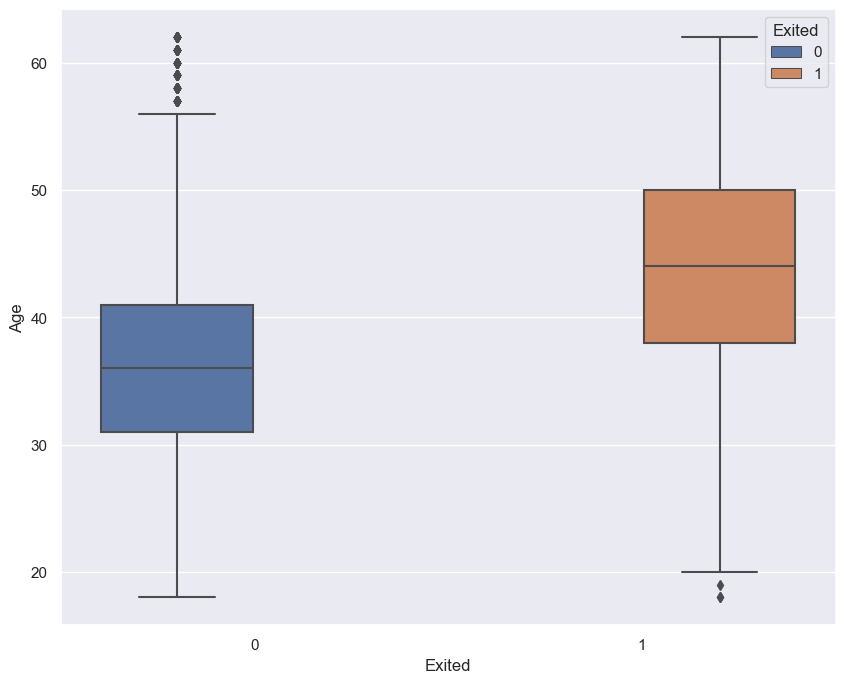

In [89]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x="Exited",y="Age",hue="Exited")

# Removed outliers

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

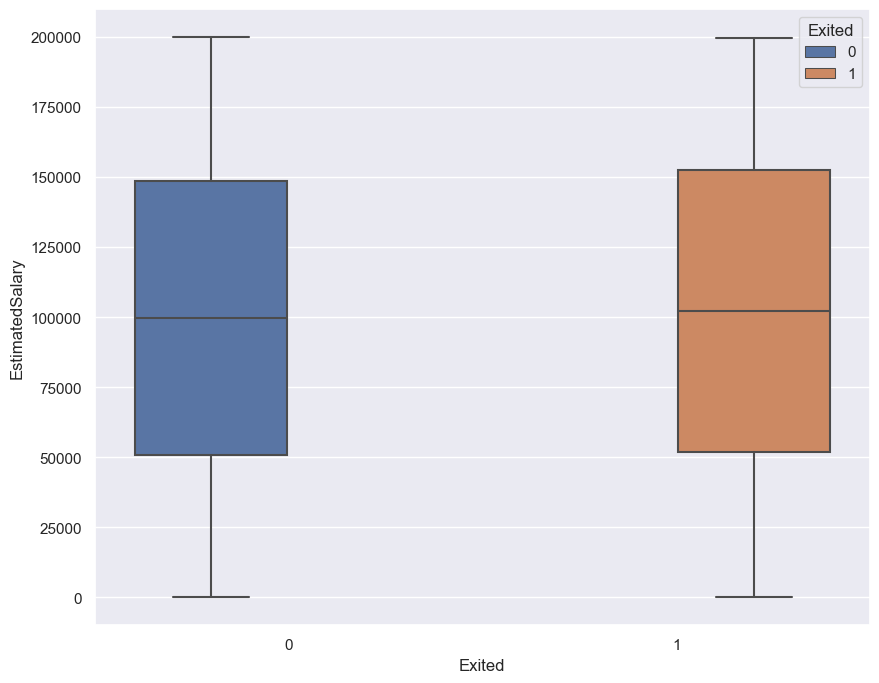

In [90]:

plt.figure(figsize=(10,8))
sns.boxplot(data=data,x="Exited",y="EstimatedSalary",hue="Exited")

<Axes: xlabel='Exited', ylabel='Balance'>

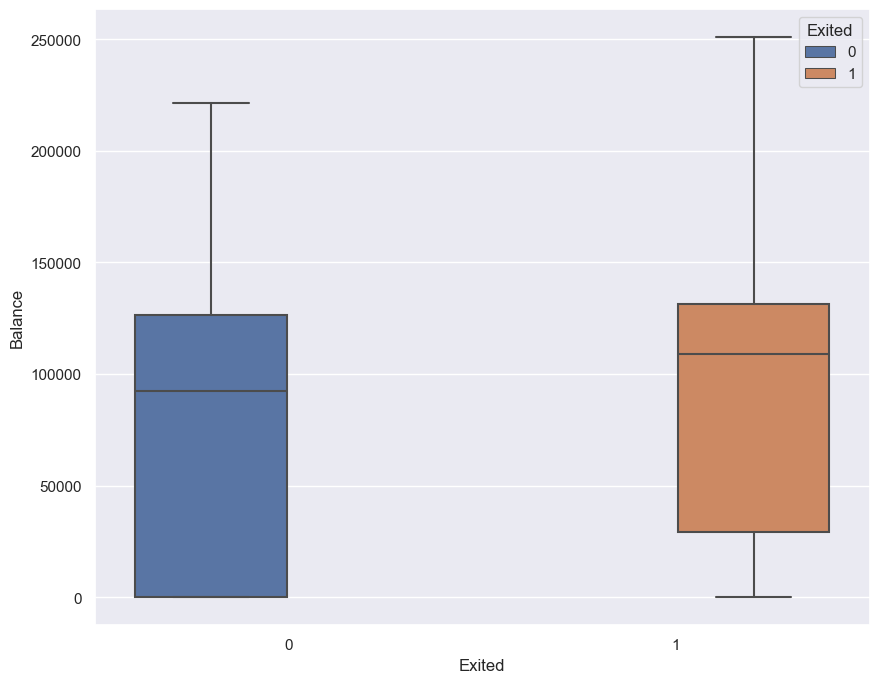

In [91]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x="Exited",y="Balance",hue="Exited")


In [92]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Kenya,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Uganda,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Kenya,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Kenya,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Uganda,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Kenya,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Kenya,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Kenya,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Tanzania,Male,42,3,75075.31,2,1,0,92888.52,1


In [93]:
data["Geography"]=data["Geography"].map({"Kenya":0,"Tanzania":1,"Uganda":2})
data["Gender"]=data["Gender"].map({"Male":0,"Female":1})


C:\Users\DELL\AppData\Local\Temp\ipykernel_2652\1765747074.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_2652\1765747074.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



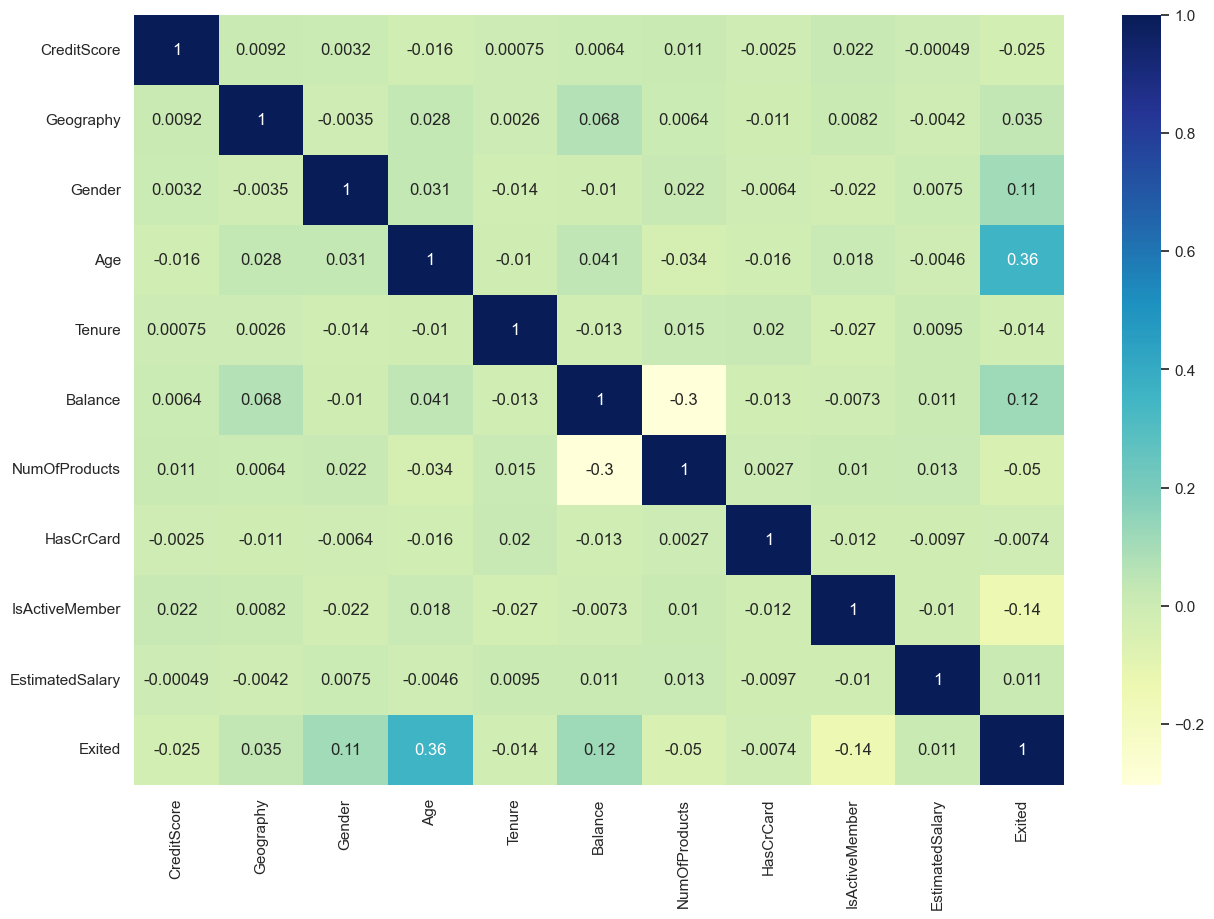

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.savefig("Correlation matrix between input features")

plt.show()

In [95]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [96]:
x=data.drop(["Exited","Geography"],axis=1)
y=data["Exited"]

In [97]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,42,2,0.00,1,1,1,101348.88
1,608,1,41,1,83807.86,1,0,1,112542.58
2,502,1,42,8,159660.80,3,1,0,113931.57
3,699,1,39,1,0.00,2,0,0,93826.63
4,850,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64
9996,516,0,35,10,57369.61,1,1,1,101699.77
9997,709,1,36,7,0.00,1,0,1,42085.58
9998,772,0,42,3,75075.31,2,1,0,92888.52


In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [99]:
lr= LogisticRegression()

lr.fit(x_train_scaled,y_train)
y_pred=lr.predict(x_test_scaled)

accuracy=accuracy_score(y_pred,y_test)
f1= f1_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)

print("Accuracy:",accuracy)
print("F1:",f1)
print("Recall:",recall)
print("Precision:",precision)

cm=confusion_matrix(y_pred,y_test)
print(cm)

Accuracy: 0.8201140487299119
F1: 0.3880070546737213
Recall: 0.6832298136645962
Precision: 0.270935960591133
[[1472  296]
 [  51  110]]


In [115]:
dtree= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=3,random_state=42)

dtree.fit(x_train_scaled,y_train)
y_pred=dtree.predict(x_test_scaled)

accuracy=accuracy_score(y_pred,y_test)
f1= f1_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)

print("Accuracy:",accuracy)
print("F1:",f1)
print("Recall:",recall)
print("Precision:",precision)

cm=confusion_matrix(y_pred,y_test)
print(cm)

Accuracy: 0.8377397615344738
F1: 0.5147286821705427
Recall: 0.694560669456067
Precision: 0.4088669950738916
[[1450  240]
 [  73  166]]


In [114]:
svm=SVC(kernel="rbf",C=0.5)

svm.fit(x_train_scaled,y_train)
y_pred=svm.predict(x_test_scaled)

accuracy=accuracy_score(y_pred,y_test)
f1= f1_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)

print("Accuracy:",accuracy)
print("F1:",f1)
print("Recall:",recall)
print("Precision:",precision)

cm=confusion_matrix(y_pred,y_test)
print(cm)

Accuracy: 0.8418869880767237
F1: 0.4732297063903281
Recall: 0.791907514450867
Precision: 0.3374384236453202
[[1487  269]
 [  36  137]]


In [113]:
rforest= RandomForestClassifier(n_estimators=10,min_samples_leaf=2,min_samples_split=4,random_state=42)

rforest.fit(x_train_scaled,y_train)
y_pred=dtree.predict(x_test_scaled)

accuracy=accuracy_score(y_pred,y_test)
f1= f1_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)

print("Accuracy:",accuracy)
print("F1:",f1)
print("Recall:",recall)
print("Precision:",precision)

cm=confusion_matrix(y_pred,y_test)
print(cm)

Accuracy: 0.8377397615344738
F1: 0.5147286821705427
Recall: 0.694560669456067
Precision: 0.4088669950738916
[[1450  240]
 [  73  166]]


In [103]:
param_grid={
    "n_estimators":[10,20,30],
    "min_samples_leaf":[2,3,5],
    "min_samples_split":[3,5,6]
}

estimator=RandomForestClassifier(random_state=42)

grid = GridSearchCV(estimator=estimator,param_grid=param_grid,cv=5,scoring="neg_mean_squared_error")
grid.fit(x_train, y_train)

best_model = grid.best_estimator_
print(f"Best model: {best_model}")
print(f"Best score: {grid.best_score_}")

Best model: RandomForestClassifier(min_samples_leaf=5, min_samples_split=3, n_estimators=30,
                       random_state=42)
Best score: -0.14198560420559608


In [104]:
best_model = RandomForestClassifier(min_samples_leaf=3,min_samples_split=3,n_estimators=20,random_state=42)

selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(x_train, y_train)

selected_features = x_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")

Selected features: Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Feature ranks: [1 1 1 1 1 1 2 1 1]


In [105]:
selected_features_list = selected_features.tolist()

if ["Exited","Geography"] in selected_features_list:
    selected_features_list.remove(["Exited","Geography"])

x_train_selected = x_train[selected_features_list]
x_test_selected = x_test[selected_features_list]

In [106]:
selected_features

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [107]:
x_train_selected

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
546,587,0,38,0,0.00,2,0,47414.15
499,570,1,58,8,0.00,1,1,116503.92
2145,633,0,33,4,137847.41,2,0,98349.13
1265,534,1,55,8,116973.26,3,0,122066.50
6693,637,0,27,9,128940.24,1,0,46786.92
...,...,...,...,...,...,...,...,...
5946,590,0,32,9,0.00,2,0,138889.15
5387,669,0,22,10,0.00,2,0,176163.74
5592,576,0,19,6,0.00,2,0,72306.07
889,542,1,43,8,145618.37,1,1,10350.74


In [108]:
best_model=best_model.fit(x_train_selected, y_train)

y_pred = best_model.predict(x_test_selected)

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 0.8429237947122862


In [109]:
y_pred = best_model.predict(x_test_selected)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 0.8429
Precision: 0.7269
Recall: 0.4064
F1-score: 0.5213
AUC-ROC: 0.6828


Model performance has an accuracy of 84%

Text(0.5, 1.0, 'Confusion matrix')

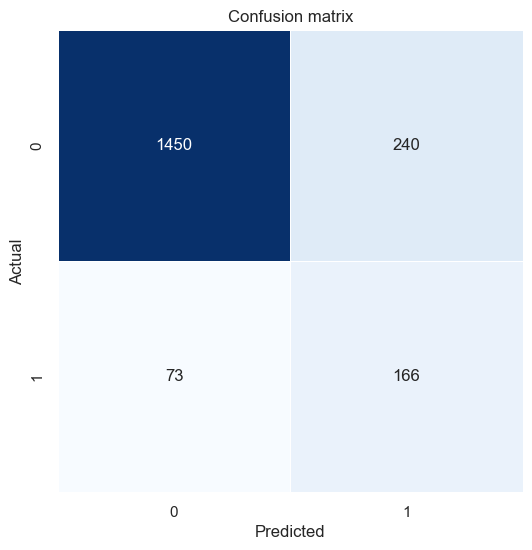

In [117]:
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=0.5)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix")

In [111]:
selected_features_list = selected_features.tolist()

with open("selected_features.json", "w") as f:
    json.dump(selected_features_list, f)

In [112]:
joblib.dump(best_model, "best_model1.pkl")

['best_model1.pkl']